# Load

In [ ]:
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import AnnData
from scipy.sparse import diags
from scipy.io import mmwrite
from tqdm import tqdm
from pathlib import Path
from typing import Union, Optional
import pickle
import seaborn as sns

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
from scipy import sparse
from scipy.optimize import fsolve,minimize

In [ ]:
from scDenorm.denorm import *

In [ ]:
from scAnnot.tools import *

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def fit_nb(ms):
    
    def nb_func(x, phi):
        return x[0] + (phi * x[0] ** 2)
    
    popt, _ = curve_fit(nb_func, ms['mean'], ms['var'], p0=[1])
    phi = popt[0]
    
    ms['zeros_p'] = np.exp(-ms['mean'])
    ms['zeros_nb'] = (1 + phi * ms['mean']) ** (-1 / phi)
    ms['newVar'] = ms['mean'] + phi * ms['mean'] ** 2
    return ms

In [ ]:
def plot_mv(cmean,cvar,c='blue',fit=False,save=None):
    fig, ax = plt.subplots()
    ax.loglog()
    ax.scatter(cmean, cvar,s=20,c=c)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, linestyle='--', linewidth=2, alpha=0.75, zorder=0,color='black', label='line')
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel('Mean',fontsize=18)
    ax.set_ylabel('Variance',fontsize=18)
    
    if fit:
        ms=pd.DataFrame({'mean':cmean[0],'var':cvar[0]})
        ms=fit_nb(ms)
        ms=ms.sort_values('mean')
        plt.plot(ms['mean'],ms['newVar'],'k-', alpha=1, zorder=ms.shape[0],color='red', label='line')
    if save:
        plt.savefig(save,dpi=300, bbox_inches='tight',transparent=True)

In [ ]:
def RCplot(smtx,xl='Rank of count frequency',yl='Value',xm=None,ym=None,alpha=1,save=None):
    fig, ax = plt.subplots()
    for c_idx in range(smtx.shape[0]):
        c = pd.Series(smtx.getrow(c_idx).data)
        c=c.value_counts().sort_index()
        y = np.array(c.index)
        x = np.arange(0, c.shape[0])+1
        ax.scatter(x, y,alpha=alpha);


    #ax.legend(fontsize=15,bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.spines[['right', 'top']].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.set_xlabel(xl,fontsize=18)
    ax.set_ylabel(yl,fontsize=18)
    if ym:
        plt.ylim(0,ym)
    if xm:
        plt.xlim(0,xm)
        plt.plot(np.arange(xm),np.arange(xm),'k-', alpha=1, zorder=0)
    if save:
        plt.savefig(save,dpi=300, bbox_inches='tight',transparent=True)

In [ ]:
def solve_bc(p,y1,y2):
    return sum((np.exp(y2*np.log(p[0]))-2*np.exp(y1*np.log(p[0]))+p[1])**2)

In [ ]:
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)

# Read scATAC

In [ ]:
ad=sc.read('/home/huang_ziliang/project/Pipeline/signac/brain1.h5ad')

In [ ]:
smtx=ad.layers['counts'].copy()

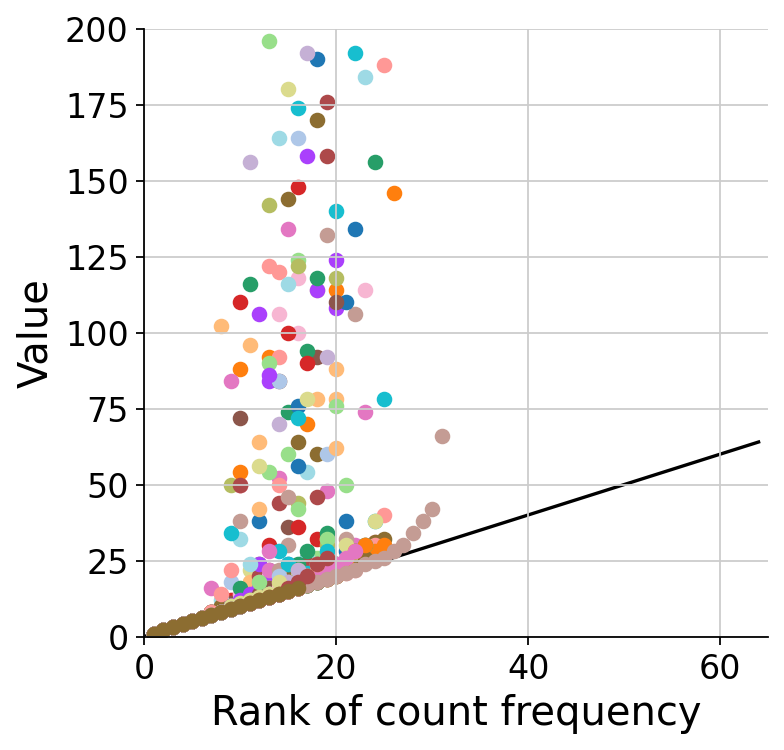

In [ ]:
figsize(5,5)
RCplot(smtx[:200],xm=65,ym=200)

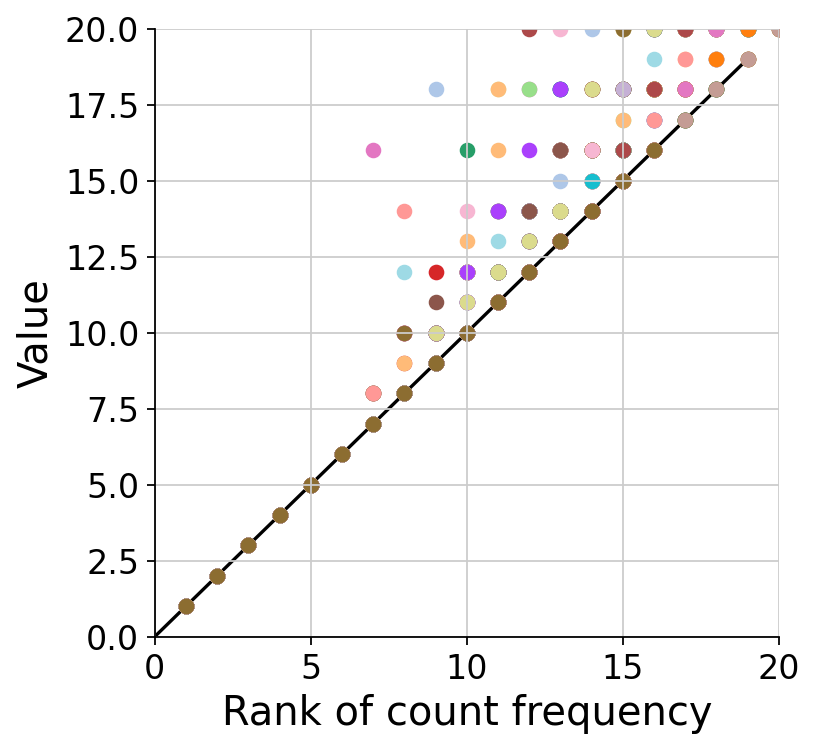

In [ ]:
figsize(5,5)
RCplot(smtx[:200],xm=20,ym=20)

/tmp/ipykernel_14244/783768956.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(ms['mean'],ms['newVar'],'k-', alpha=1, zorder=ms.shape[0],color='red', label='line')


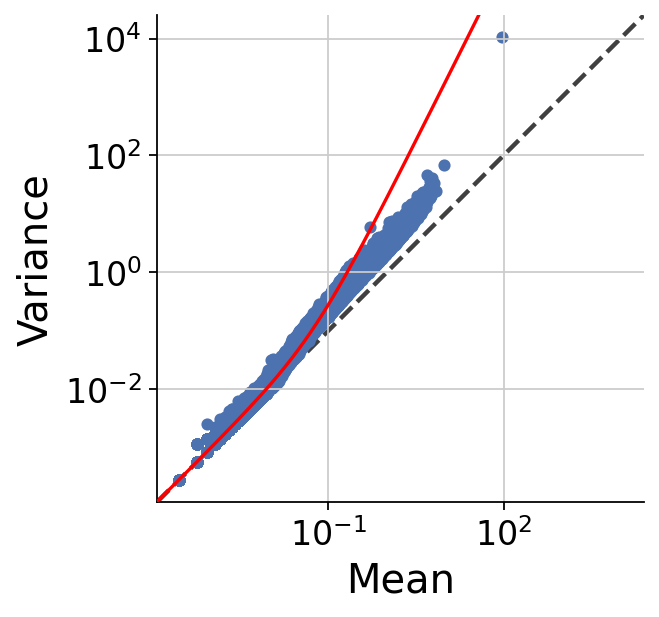

In [ ]:
#figsize(5,5)
cmean = np.array(smtx.mean(0))
cvar = np.array(smtx.power(2).mean(0) - cmean ** 2)
#A
plot_mv(cmean,cvar,c='#4C72B0',fit=True)

In [ ]:
ad1=sc.read('/home/huang_ziliang/project/Pipeline/signac/brain1.h5ad')

INFO:root:The dimensions of this data are (3512, 157203).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


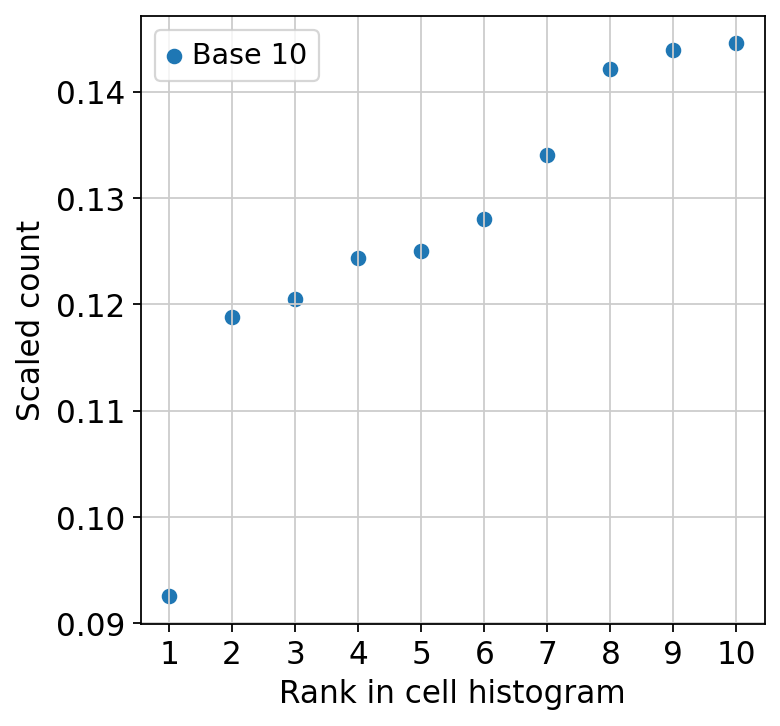

In [ ]:
ad=scdenorm(ad1,verbose=1)

In [ ]:
ad2=sc.read('/home/huang_ziliang/project/Pipeline/signac/brain2.h5ad')

INFO:root:The dimensions of this data are (3512, 157203).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


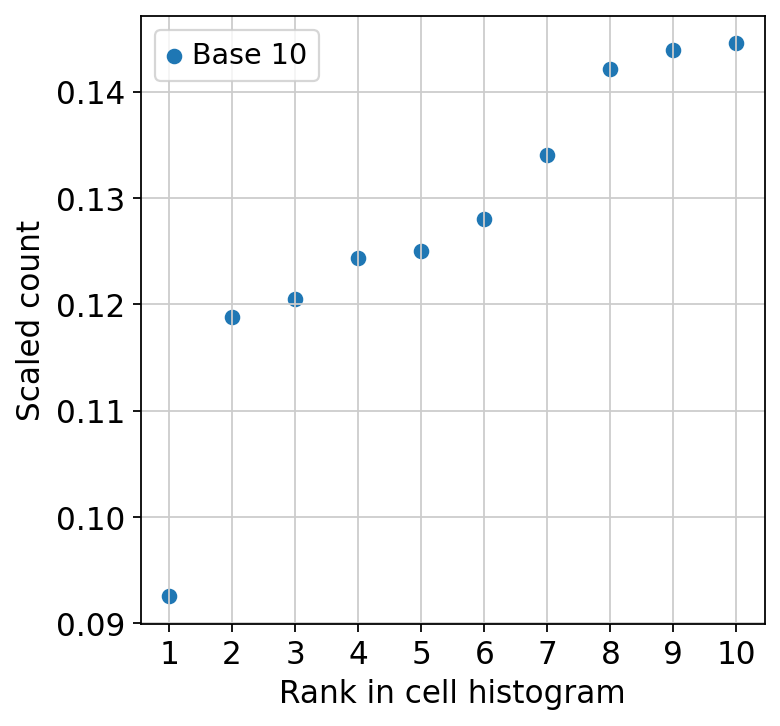

In [ ]:
ad=scdenorm(ad2,verbose=1)

In [ ]:
ad3=sc.read('/home/huang_ziliang/project/Pipeline/signac/brain3.h5ad')

INFO:root:The dimensions of this data are (3512, 157203).
INFO:root:select base
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


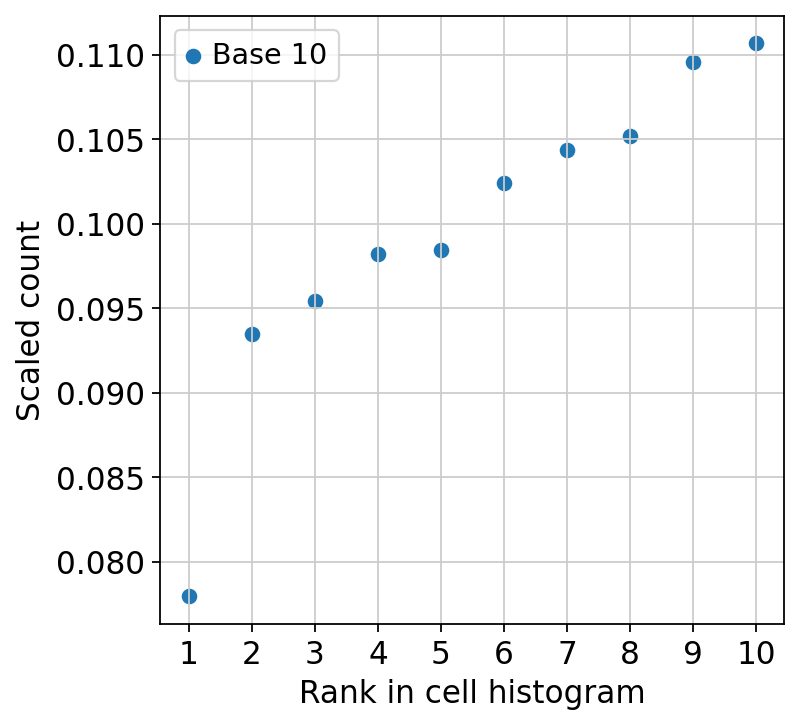

In [ ]:
ad=scdenorm(ad3,verbose=1)

In [ ]:
ad4=sc.read('/home/huang_ziliang/project/Pipeline/signac/brain4.h5ad')

INFO:root:The dimensions of this data are (3512, 157203).
INFO:root:select base
/home/huang_yin/github/sc/scDenorm/scDenorm/denorm.py:120: RuntimeWarning: overflow encountered in power
  x=base**x-cont
ERROR:root:The base 2.718281828459045 is not match with the data.
ERROR:root:The base 1 is not match with the data.
ERROR:root:The base 2 is not match with the data.
ERROR:root:The base 10 is not match with the data.
INFO:root:denormlizing ...the base is 10
ERROR:root:The base 10 is not match with the data.
ERROR:root:Denormlization has failed. Output the orignal data


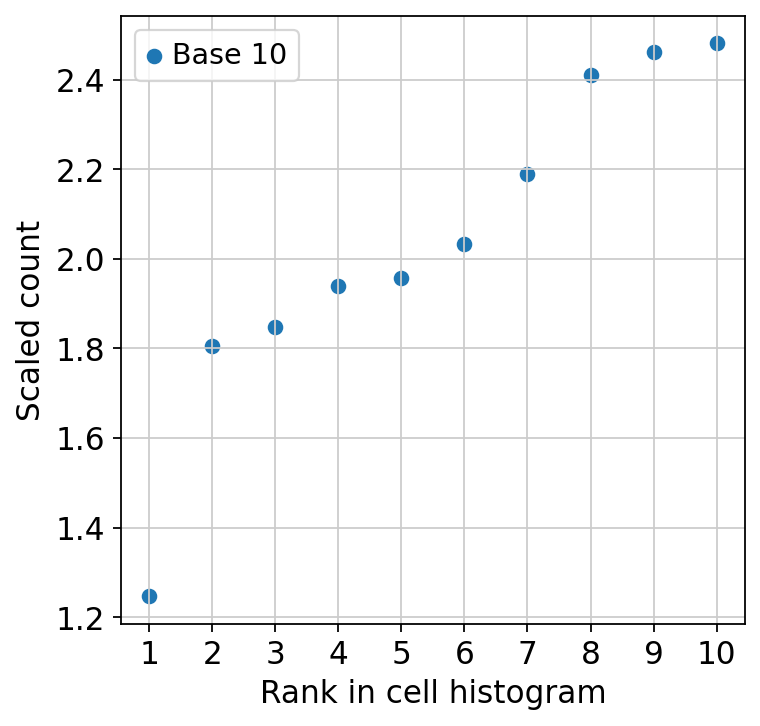

In [ ]:
ad=scdenorm(ad4,verbose=1)

In [ ]:
ad1.X.data

array([0.92096414, 1.41421823, 2.01265411, ..., 2.03192599, 2.74440056,
       3.10334684])

In [ ]:
ad2.X.data

array([0.92096414, 1.41421823, 2.01265411, ..., 2.03192599, 2.74440056,
       3.10334684])

In [ ]:
ad3.X.data

array([0.42915549, 0.80079086, 1.40979144, ..., 0.5026567 , 1.0292748 ,
       1.42578986])

In [ ]:
ad4.X.data

array([ 6.24911032, 12.49822064, 12.49822064, ..., 48.10958904,
       48.10958904, 48.10958904])

In [ ]:
ad.X=ad.layers['counts'].copy()

In [ ]:
adata=ad.copy()

In [ ]:
cond=[
[1e3,np.e,1],
[1e4,np.e,1],
[1e5,np.e,1],
[1e6,np.e,1],
[1e4,2,1],
[1e4,10,1],
[1e4,np.e,0.01],
[1e4,np.e,0.1],
]

1000.0 2.718281828459045 1 [2.71828343 0.99999999] 3.251790395226421e-15


100%|██████████| 3512/3512 [06:55<00:00,  8.45it/s]


10000.0 2.718281828459045 1 [2.7182819  0.99999999] 3.747010104860199e-15


100%|██████████| 3512/3512 [06:51<00:00,  8.53it/s]


100000.0 2.718281828459045 1 [2.71828182 1.00000001] 1.4149445978971187e-14


100%|██████████| 3512/3512 [06:58<00:00,  8.39it/s]


1000000.0 2.718281828459045 1 [2.71828182 1.00000027] 4.610212118619422e-12


100%|██████████| 3512/3512 [06:52<00:00,  8.51it/s]


10000.0 2 1 [2.         1.00000001] 1.891251400699032e-14


100%|██████████| 3512/3512 [07:18<00:00,  8.00it/s]


10000.0 10 1 [10.0000004   0.99999999] 4.044092560993371e-15


100%|██████████| 3512/3512 [07:21<00:00,  7.95it/s]


10000.0 2.718281828459045 0.01 [2.71828185 0.00999999] 3.8615928029807874e-15


100%|██████████| 3512/3512 [07:11<00:00,  8.13it/s]


10000.0 2.718281828459045 0.1 [2.71828186 0.09999999] 5.4874679211913326e-15


100%|██████████| 3512/3512 [07:08<00:00,  8.20it/s]


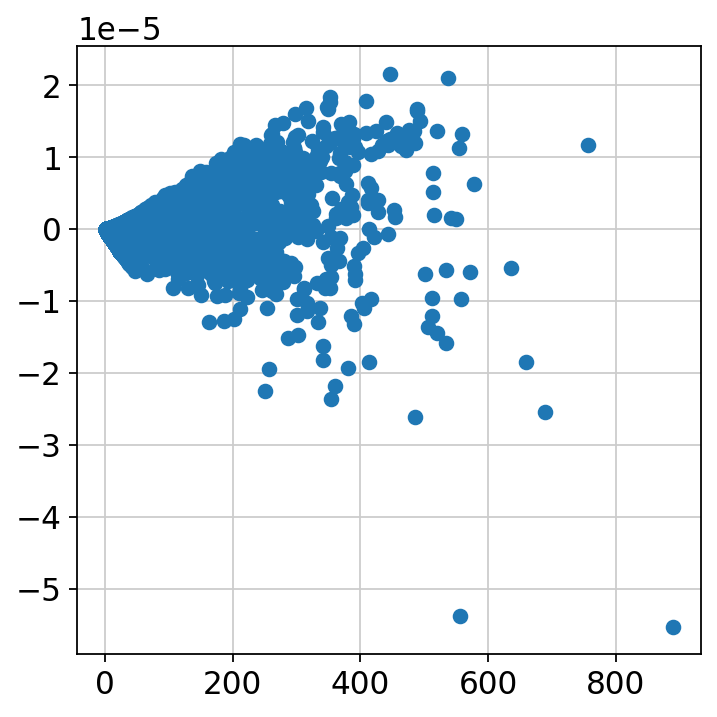

{'bodies': [<matplotlib.collections.PolyCollection>,
  <matplotlib.collections.PolyCollection>,
  <matplotlib.collections.PolyCollection>,
  <matplotlib.collections.PolyCollection>,
  <matplotlib.collections.PolyCollection>,
  <matplotlib.collections.PolyCollection>,
  <matplotlib.collections.PolyCollection>,
  <matplotlib.collections.PolyCollection>],
 'cmaxes': <matplotlib.collections.LineCollection>,
 'cmins': <matplotlib.collections.LineCollection>,
 'cbars': <matplotlib.collections.LineCollection>}

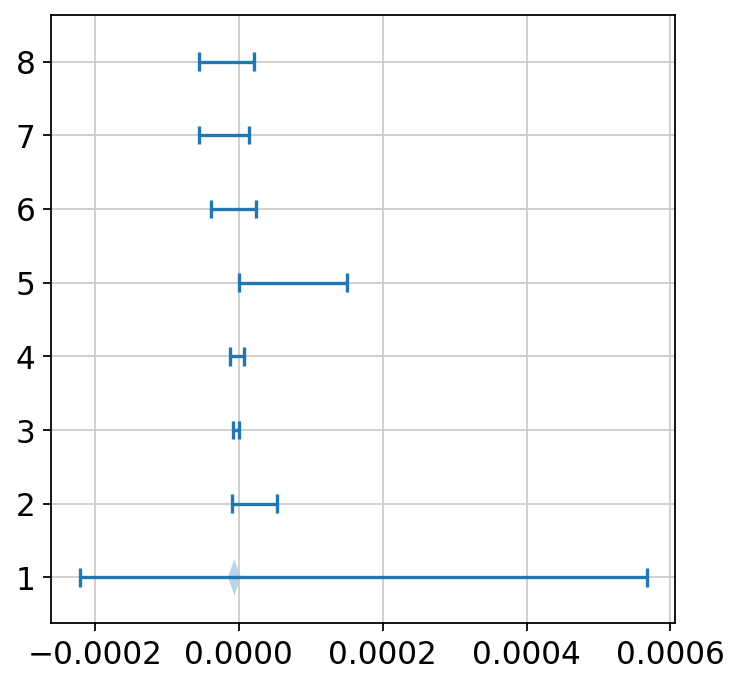

In [ ]:
rs,new_ads=[],[]
for ts,b,c in cond:
    ad=adata.copy()
    ad.X=sparse.csc_matrix(ad.X)
    ad.layers['count']=ad.X.copy()
    sc.pp.normalize_total(ad, target_sum=ts)
    ad.X.data=np.log(ad.X.data+c) / np.log(b)
    #sc.pp.log1p(ad,base=b)
    #auto solve
    smtx2=ad.X
    np.random.seed(0)
    ys=[]
    for c_idx in np.random.choice(range(smtx2.shape[0]),min(smtx2.shape[0],100),replace=False):
        try:
            r = pd.Series(smtx2.getrow(c_idx).data)
            y = np.array(r.value_counts().sort_index().head(2).index)
            ys.append(y)
        except:
            print(c_idx)
    ys=np.array(ys)
    y1=ys[:,0]
    y2=ys[:,1]
    res = minimize(solve_bc, [20,1], method='L-BFGS-B', tol=1e-10,bounds=[(1.9, None), (1e-6, None)],args=(ys[:,0],ys[:,1]))
    print(ts,b,c,res.x,res.fun)
    b,c=res.x
    new_ad=scdenorm(ad,base=b,cont=c,cutoff=0.5,rint=False)
    new_ad.X=sparse.csc_matrix(new_ad.X)
    if np.array_equal(ad.X.indices, new_ad.X.indices) and np.array_equal(ad.X.indptr, new_ad.X.indptr):
        res=new_ad.X.data-new_ad.layers['count'].data
    else:
        raise('index not match')
    rs.append(res)
    new_ads.append(new_ad.copy())
plt.plot(new_ad.layers['count'].data,res,'o')
plt.show()
plt.violinplot(rs,vert=False)